In [3]:
# import necessary library
import pandas as pd
import math
import seaborn as sns
from matplotlib import pyplot as plt
import re
import numpy as np
import geopandas as gpd
from shapely.geometry import Point # Point class
from shapely.geometry import shape

C:\Users\Md Mintu Miah\anaconda3\envs\geo_env\lib\site-packages\geopandas\_compat.py:112: UserWarning: The Shapely GEOS version (3.11.0-CAPI-1.17.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [4]:
# surpres all warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
# avoid unecessary zeros after interger year
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

In [6]:
# Read eco data
# read the eco_data
df1=pd.read_csv('C:/UC Berkeley Project Backup/AT Census/Pedestrain Data/eco_pedestrain_2018_hourly.csv')
df2=pd.read_csv('C:/UC Berkeley Project Backup/AT Census/Pedestrain Data/eco_pedestrain_2019_hourly.csv')
df3=pd.read_csv('C:/UC Berkeley Project Backup/AT Census/Pedestrain Data/eco_pedestrain_2020_hourly.csv')
df4=pd.read_csv('C:/UC Berkeley Project Backup/AT Census/Pedestrain Data/eco_pedestrain_2021_hourly.csv')

C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_14276\3244182022.py:3: DtypeWarning: Columns (13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv('C:/UC Berkeley Project Backup/AT Census/Pedestrain Data/eco_pedestrain_2018_hourly.csv')
C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_14276\3244182022.py:4: DtypeWarning: Columns (13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df2=pd.read_csv('C:/UC Berkeley Project Backup/AT Census/Pedestrain Data/eco_pedestrain_2019_hourly.csv')
C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_14276\3244182022.py:5: DtypeWarning: Columns (12,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df3=pd.read_csv('C:/UC Berkeley Project Backup/AT Census/Pedestrain Data/eco_pedestrain_2020_hourly.csv')
C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_14276\3244182022.py:6: DtypeWarning: Columns (13,15) have mixed types. Specify dtype

In [7]:
df1.head()

,Unnamed: 0,date,isoDate,counts,status,id,site_name,channel_name,latitude,longitude,direction,type,installationDate,counter,interval,city,state,country2
0,0,2018-01-01T00:00:00+0000,2018-01-01T00:00:00-0800,0.00,0.00,101000572,Park Trail,Park Trail- Peds IN to Crissy,37.80,-122.47,1,real,2010-12-23T00:00:00-0800,XPI14106541,60,San Francisco,California,United States
1,1,2018-01-01T01:00:00+0000,2018-01-01T01:00:00-0800,0.00,0.00,101000572,Park Trail,Park Trail- Peds IN to Crissy,37.80,-122.47,1,real,2010-12-23T00:00:00-0800,XPI14106541,60,San Francisco,California,United States
2,2,2018-01-01T02:00:00+0000,2018-01-01T02:00:00-0800,0.00,0.00,101000572,Park Trail,Park Trail- Peds IN to Crissy,37.80,-122.47,1,real,2010-12-23T00:00:00-0800,XPI14106541,60,San Francisco,California,United States
3,3,2018-01-01T03:00:00+0000,2018-01-01T03:00:00-0800,0.00,0.00,101000572,Park Trail,Park Trail- Peds IN to Crissy,37.80,-122.47,1,real,2010-12-23T00:00:00-0800,XPI14106541,60,San Francisco,California,United States
4,4,2018-01-01T04:00:00+0000,2018-01-01T04:00:00-0800,0.00,0.00,101000572,Park Trail,Park Trail- Peds IN to Crissy,37.80,-122.47,1,real,2010-12-23T00:00:00-0800,XPI14106541,60,San Francisco,California,United States


In [8]:
# Combine the data
df18i=pd.concat([df1,df2,df3,df4],axis=0)
df18i.head()

,Unnamed: 0,date,isoDate,counts,status,id,site_name,channel_name,latitude,longitude,direction,type,installationDate,counter,interval,city,state,country2
0,0,2018-01-01T00:00:00+0000,2018-01-01T00:00:00-0800,0.00,0.00,101000572,Park Trail,Park Trail- Peds IN to Crissy,37.80,-122.47,1,real,2010-12-23T00:00:00-0800,XPI14106541,60,San Francisco,California,United States
1,1,2018-01-01T01:00:00+0000,2018-01-01T01:00:00-0800,0.00,0.00,101000572,Park Trail,Park Trail- Peds IN to Crissy,37.80,-122.47,1,real,2010-12-23T00:00:00-0800,XPI14106541,60,San Francisco,California,United States
2,2,2018-01-01T02:00:00+0000,2018-01-01T02:00:00-0800,0.00,0.00,101000572,Park Trail,Park Trail- Peds IN to Crissy,37.80,-122.47,1,real,2010-12-23T00:00:00-0800,XPI14106541,60,San Francisco,California,United States
3,3,2018-01-01T03:00:00+0000,2018-01-01T03:00:00-0800,0.00,0.00,101000572,Park Trail,Park Trail- Peds IN to Crissy,37.80,-122.47,1,real,2010-12-23T00:00:00-0800,XPI14106541,60,San Francisco,California,United States
4,4,2018-01-01T04:00:00+0000,2018-01-01T04:00:00-0800,0.00,0.00,101000572,Park Trail,Park Trail- Peds IN to Crissy,37.80,-122.47,1,real,2010-12-23T00:00:00-0800,XPI14106541,60,San Francisco,California,United States


In [9]:
# collapse the date column
df18i[[ "Date","Start Time1"]] = df18i["isoDate"].str.split("T", expand = True)
df18i[[ "Start Time","Time Zone"]] = df18i["Start Time1"].str.split("-", expand = True)
df18i.head()

,Unnamed: 0,date,isoDate,counts,status,id,site_name,channel_name,latitude,longitude,...,installationDate,counter,interval,city,state,country2,Date,Start Time1,Start Time,Time Zone
0,0,2018-01-01T00:00:00+0000,2018-01-01T00:00:00-0800,0.00,0.00,101000572,Park Trail,Park Trail- Peds IN to Crissy,37.80,-122.47,...,2010-12-23T00:00:00-0800,XPI14106541,60,San Francisco,California,United States,2018-01-01,00:00:00-0800,00:00:00,0800
1,1,2018-01-01T01:00:00+0000,2018-01-01T01:00:00-0800,0.00,0.00,101000572,Park Trail,Park Trail- Peds IN to Crissy,37.80,-122.47,...,2010-12-23T00:00:00-0800,XPI14106541,60,San Francisco,California,United States,2018-01-01,01:00:00-0800,01:00:00,0800
2,2,2018-01-01T02:00:00+0000,2018-01-01T02:00:00-0800,0.00,0.00,101000572,Park Trail,Park Trail- Peds IN to Crissy,37.80,-122.47,...,2010-12-23T00:00:00-0800,XPI14106541,60,San Francisco,California,United States,2018-01-01,02:00:00-0800,02:00:00,0800
3,3,2018-01-01T03:00:00+0000,2018-01-01T03:00:00-0800,0.00,0.00,101000572,Park Trail,Park Trail- Peds IN to Crissy,37.80,-122.47,...,2010-12-23T00:00:00-0800,XPI14106541,60,San Francisco,California,United States,2018-01-01,03:00:00-0800,03:00:00,0800
4,4,2018-01-01T04:00:00+0000,2018-01-01T04:00:00-0800,0.00,0.00,101000572,Park Trail,Park Trail- Peds IN to Crissy,37.80,-122.47,...,2010-12-23T00:00:00-0800,XPI14106541,60,San Francisco,California,United States,2018-01-01,04:00:00-0800,04:00:00,0800


In [10]:
# create day, month, year and weekday and weekend identifier
df18i['Date'] = pd.to_datetime(df18i['Date'], errors='coerce')
df18i['date'] = df18i['Date'].dt.strftime('%Y-%m-%d')

df18i['month'] = df18i['Date'].dt.month
df18i['year'] = df18i['Date'].dt.year
df18i['day'] = df18i['Date'].dt.day
df18i['weekno']=df18i['Date'].dt.week
#in day of week Monday=0 and sunday=6
df18i['dayofweek'] = df18i['Date'].dt.dayofweek
# weekday=0 and weekend=1
df18i['weekday_Status'] = np.where(df18i['dayofweek'].isin([0,1,2,3,4]),0,1)
df18i.head()

,Unnamed: 0,date,isoDate,counts,status,id,site_name,channel_name,latitude,longitude,...,Date,Start Time1,Start Time,Time Zone,month,year,day,weekno,dayofweek,weekday_Status
0,0,2018-01-01,2018-01-01T00:00:00-0800,0.00,0.00,101000572,Park Trail,Park Trail- Peds IN to Crissy,37.80,-122.47,...,2018-01-01,00:00:00-0800,00:00:00,0800,1,2018,1,1,0,0
1,1,2018-01-01,2018-01-01T01:00:00-0800,0.00,0.00,101000572,Park Trail,Park Trail- Peds IN to Crissy,37.80,-122.47,...,2018-01-01,01:00:00-0800,01:00:00,0800,1,2018,1,1,0,0
2,2,2018-01-01,2018-01-01T02:00:00-0800,0.00,0.00,101000572,Park Trail,Park Trail- Peds IN to Crissy,37.80,-122.47,...,2018-01-01,02:00:00-0800,02:00:00,0800,1,2018,1,1,0,0
3,3,2018-01-01,2018-01-01T03:00:00-0800,0.00,0.00,101000572,Park Trail,Park Trail- Peds IN to Crissy,37.80,-122.47,...,2018-01-01,03:00:00-0800,03:00:00,0800,1,2018,1,1,0,0
4,4,2018-01-01,2018-01-01T04:00:00-0800,0.00,0.00,101000572,Park Trail,Park Trail- Peds IN to Crissy,37.80,-122.47,...,2018-01-01,04:00:00-0800,04:00:00,0800,1,2018,1,1,0,0


In [11]:
# split the eco id and bring same id regardless of direction, last four digit of eco id is same for each of the direction
v = df18i.id.astype(str)
df18i['device_number'], df18i['ID'] = v.str[:4], v.str[4:]
#Drop 2015 data
df18i=df18i.loc[df18i['year']>2015]
df18i.head()

,Unnamed: 0,date,isoDate,counts,status,id,site_name,channel_name,latitude,longitude,...,Start Time,Time Zone,month,year,day,weekno,dayofweek,weekday_Status,device_number,ID
0,0,2018-01-01,2018-01-01T00:00:00-0800,0.00,0.00,101000572,Park Trail,Park Trail- Peds IN to Crissy,37.80,-122.47,...,00:00:00,0800,1,2018,1,1,0,0,1010,00572
1,1,2018-01-01,2018-01-01T01:00:00-0800,0.00,0.00,101000572,Park Trail,Park Trail- Peds IN to Crissy,37.80,-122.47,...,01:00:00,0800,1,2018,1,1,0,0,1010,00572
2,2,2018-01-01,2018-01-01T02:00:00-0800,0.00,0.00,101000572,Park Trail,Park Trail- Peds IN to Crissy,37.80,-122.47,...,02:00:00,0800,1,2018,1,1,0,0,1010,00572
3,3,2018-01-01,2018-01-01T03:00:00-0800,0.00,0.00,101000572,Park Trail,Park Trail- Peds IN to Crissy,37.80,-122.47,...,03:00:00,0800,1,2018,1,1,0,0,1010,00572
4,4,2018-01-01,2018-01-01T04:00:00-0800,0.00,0.00,101000572,Park Trail,Park Trail- Peds IN to Crissy,37.80,-122.47,...,04:00:00,0800,1,2018,1,1,0,0,1010,00572


In [12]:
# Cpmbined the directional count by year, month, day,weekno,dayofweek,weekday_Status,  hr, lat and long, then drop the duplicate rows having same
#lat and long in the same year, then join this data with combined directional hourly count
df18=pd.DataFrame({'counts': df18i.groupby(['ID','year','month','day','weekno','dayofweek','weekday_Status','Start Time','latitude', 'longitude'])['counts'].sum()}).reset_index()
df18.head()

,ID,year,month,day,weekno,dayofweek,weekday_Status,Start Time,latitude,longitude,counts
0,00572,2018,1,1,1,0,0,00:00:00,37.80,-122.47,0.00
1,00572,2018,1,1,1,0,0,01:00:00,37.80,-122.47,0.00
2,00572,2018,1,1,1,0,0,02:00:00,37.80,-122.47,0.00
3,00572,2018,1,1,1,0,0,03:00:00,37.80,-122.47,0.00
4,00572,2018,1,1,1,0,0,04:00:00,37.80,-122.47,0.00


In [13]:
def weekday(row):
   if row['weekday_Status'] == 1:
      return 'Weekend'
   return 'Week Day'

def day_of_week(row):
   if row['dayofweek'] == 0 :
      return 'Monday'
   if row['dayofweek'] == 1 :
      return 'Tuesday'
   if row['dayofweek'] == 2 :
      return 'Wednesday'
   if row['dayofweek'] == 3 :
      return 'Thursday'
   if row['dayofweek'] == 4 :
      return 'Friday'
   if row['dayofweek'] == 5 :
      return 'Saturday'
   return 'Sunday'

In [14]:
# convert numeric day to string day of the week
df18['Day of Week']=df18.apply (lambda row: day_of_week(row), axis=1)
df18['Week Day Status']=df18.apply (lambda row: weekday(row), axis=1)
df18.head()

,ID,year,month,day,weekno,dayofweek,weekday_Status,Start Time,latitude,longitude,counts,Day of Week,Week Day Status
0,00572,2018,1,1,1,0,0,00:00:00,37.80,-122.47,0.00,Monday,Week Day
1,00572,2018,1,1,1,0,0,01:00:00,37.80,-122.47,0.00,Monday,Week Day
2,00572,2018,1,1,1,0,0,02:00:00,37.80,-122.47,0.00,Monday,Week Day
3,00572,2018,1,1,1,0,0,03:00:00,37.80,-122.47,0.00,Monday,Week Day
4,00572,2018,1,1,1,0,0,04:00:00,37.80,-122.47,0.00,Monday,Week Day


In [15]:
# rename the columne
df18=df18.rename(columns={'Start Time':'starttime'})

In [16]:
# Assign day and night
def night_day (starttime):
    if starttime=='08:00:00':
        return 'day'
    elif starttime=='09:00:00':
        return 'day'
    elif starttime=='10:00:00':
        return 'day'   
    elif starttime=='11:00:00':
        return 'day' 
    elif starttime=='12:00:00':
        return 'day'
    elif starttime=='13:00:00':
        return 'day'  
    elif starttime=='14:00:00':
        return 'day' 
    elif starttime=='15:00:00':
        return 'day'    
    elif starttime=='16:00:00':
        return 'day' 
    elif starttime=='17:00:00':
        return 'day' 
    elif starttime=='18:00:00':
        return 'day'
    elif starttime=='19:00:00':
        return 'day' 
    elif starttime=='20:00:00':
        return 'night' 
    elif starttime=='21:00:00':
        return 'night' 
    elif starttime=='22:00:00':
        return 'night'
    elif starttime=='23:00:00':
        return 'night'
    elif starttime=='24:00:00':
        return 'night'
    elif starttime=='00:00:00':
        return 'night'
    elif starttime=='01:00:00':
        return 'night'
    elif starttime=='02:00:00':
        return 'night'
    elif starttime=='03:00:00':
        return 'night'
    elif starttime=='04:00:00':
        return 'night'
    elif starttime=='05:00:00':
        return 'night'
    elif starttime=='06:00:00':
        return 'night'
    else:
        return 'night' 

In [17]:
# apply day night function
df18['day_night']=df18.apply(lambda row:night_day(row['starttime']),axis=1)

In [18]:
hour_check=pd.DataFrame({'hr_count' : df18.groupby(['ID',"year",'month','day'])["ID"].count()}).reset_index()
hour_check.head(6)

,ID,year,month,day,hr_count
0,00572,2018,1,1,24
1,00572,2018,1,2,24
2,00572,2018,1,3,24
3,00572,2018,1,4,24
4,00572,2018,1,5,24
5,00572,2018,1,6,24


In [19]:
# lets see if there is missing hour
hour_check1=hour_check.loc[hour_check['hr_count']<22]
hour_check1

,ID,year,month,day,hr_count


In [20]:
df18=df18.reset_index()

In [21]:
# save this process clean data
#df18.to_csv('C:/UC Berkeley Project Backup/AT Census/Pedestrain_Processed Data/Eco_combined_data_before_QA_QC.csv')

# Assign Rural and Urban groups based on location

In [22]:
ru_group=df18.drop_duplicates(subset=['ID','latitude','longitude'], keep='first')
ru_group.to_csv('C:/UC Berkeley Project Backup/AT Census/Processed Data/eco_counter_2019_2016_unique_location.csv')
ru_group.head()

,index,ID,year,month,day,weekno,dayofweek,weekday_Status,starttime,latitude,longitude,counts,Day of Week,Week Day Status,day_night
0,0,00572,2018,1,1,1,0,0,00:00:00,37.80,-122.47,0.00,Monday,Week Day,night
35064,35064,00588,2018,1,1,1,0,0,00:00:00,37.79,-122.46,0.00,Monday,Week Day,night
70128,70128,00589,2018,1,1,1,0,0,00:00:00,37.79,-122.46,0.00,Monday,Week Day,night
105192,105192,00595,2018,1,1,1,0,0,00:00:00,37.79,-122.46,0.00,Monday,Week Day,night
140256,140256,00671,2018,1,1,1,0,0,00:00:00,37.79,-122.46,0.00,Monday,Week Day,night


In [23]:
# combine lat and long and make it point geometry
geometry = [Point(xy) for xy in zip(ru_group.longitude, ru_group.latitude)]
#df = df.drop(['longitude', 'latitude'], axis=1)
gdf = gpd.GeoDataFrame(ru_group, crs="EPSG:4269", geometry=geometry)
gdf.head()

,index,ID,year,month,day,weekno,dayofweek,weekday_Status,starttime,latitude,longitude,counts,Day of Week,Week Day Status,day_night,geometry
0,0,00572,2018,1,1,1,0,0,00:00:00,37.80,-122.47,0.00,Monday,Week Day,night,POINT (-122.46757 37.79803)
35064,35064,00588,2018,1,1,1,0,0,00:00:00,37.79,-122.46,0.00,Monday,Week Day,night,POINT (-122.45556 37.79390)
70128,70128,00589,2018,1,1,1,0,0,00:00:00,37.79,-122.46,0.00,Monday,Week Day,night,POINT (-122.45556 37.79390)
105192,105192,00595,2018,1,1,1,0,0,00:00:00,37.79,-122.46,0.00,Monday,Week Day,night,POINT (-122.45815 37.79258)
140256,140256,00671,2018,1,1,1,0,0,00:00:00,37.79,-122.46,0.00,Monday,Week Day,night,POINT (-122.45944 37.79116)


In [24]:
# Import the CA boundary and filter the location by boundary
ca_boundary=gpd.read_file('C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/CA_Counties/CA_Counties/CA_Counties_TIGER2016.shp')
ca_boundary=ca_boundary.set_crs(epsg=3857)
ca_boundary1=ca_boundary.to_crs(epsg=4269)
ca_boundary1.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

<AxesSubplot:>

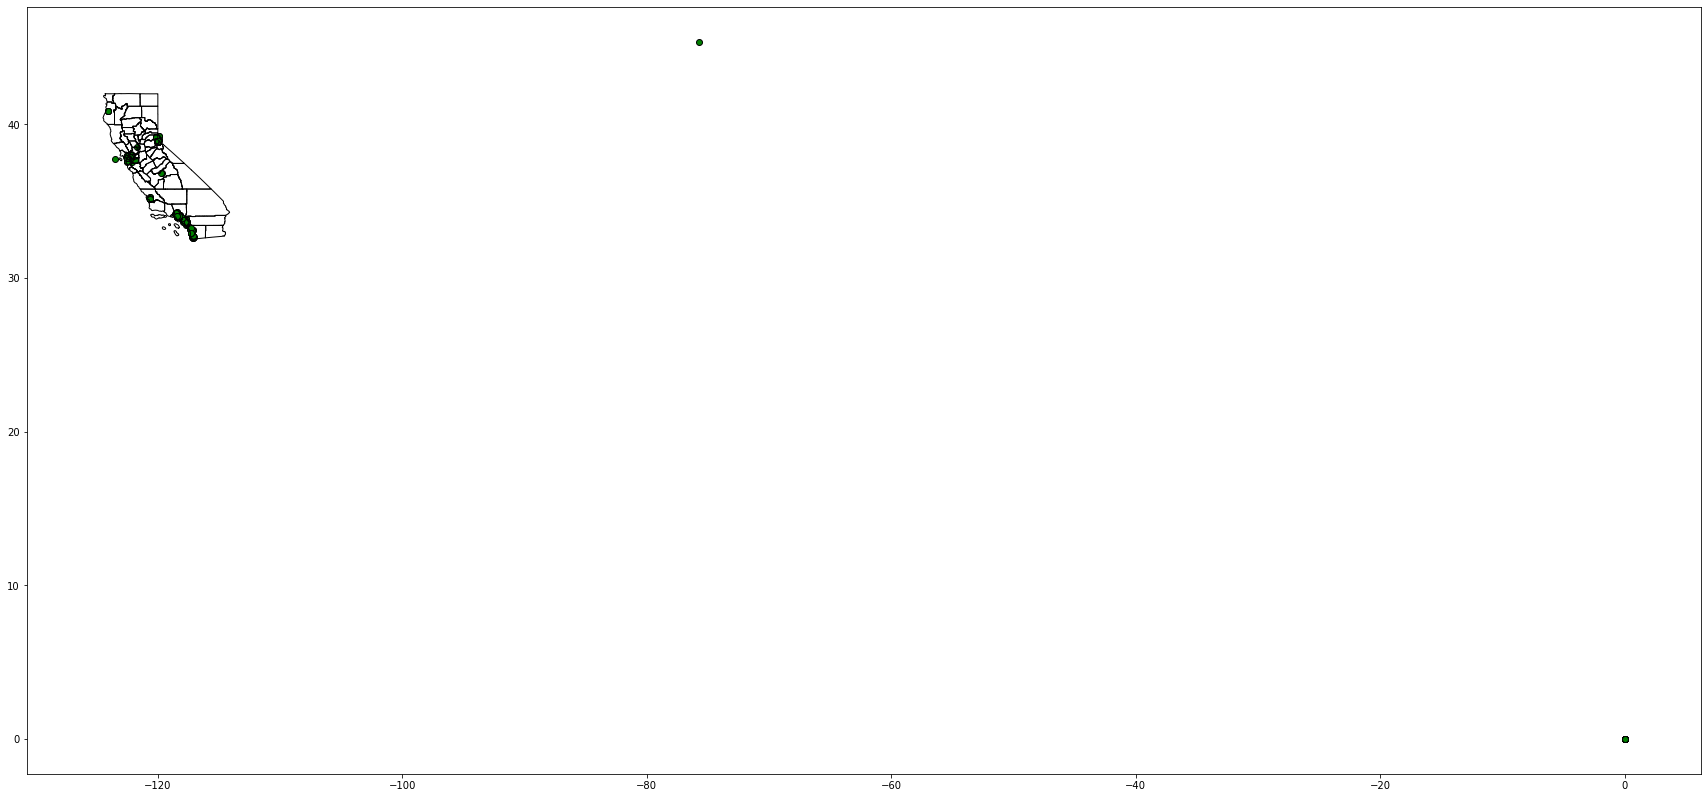

In [25]:
# visualize 
fig, ax = plt.subplots(figsize = (30,25)) 
gdf.plot(ax=ax,color="green",edgecolor='k',linewidth = 1)
ca_boundary1.plot(color="none",edgecolor='k',linewidth = 1,ax=ax) #Use your second dataframe

In [26]:
# save valid counters within the CA boundary
gdf1=gpd.clip(gdf,ca_boundary1)
gdf1.to_csv('C:/UC Berkeley Project Backup/AT Census/Pedestrain_Processed Data/eco_counter_2019_2016_corrected_location.csv')

<AxesSubplot:>

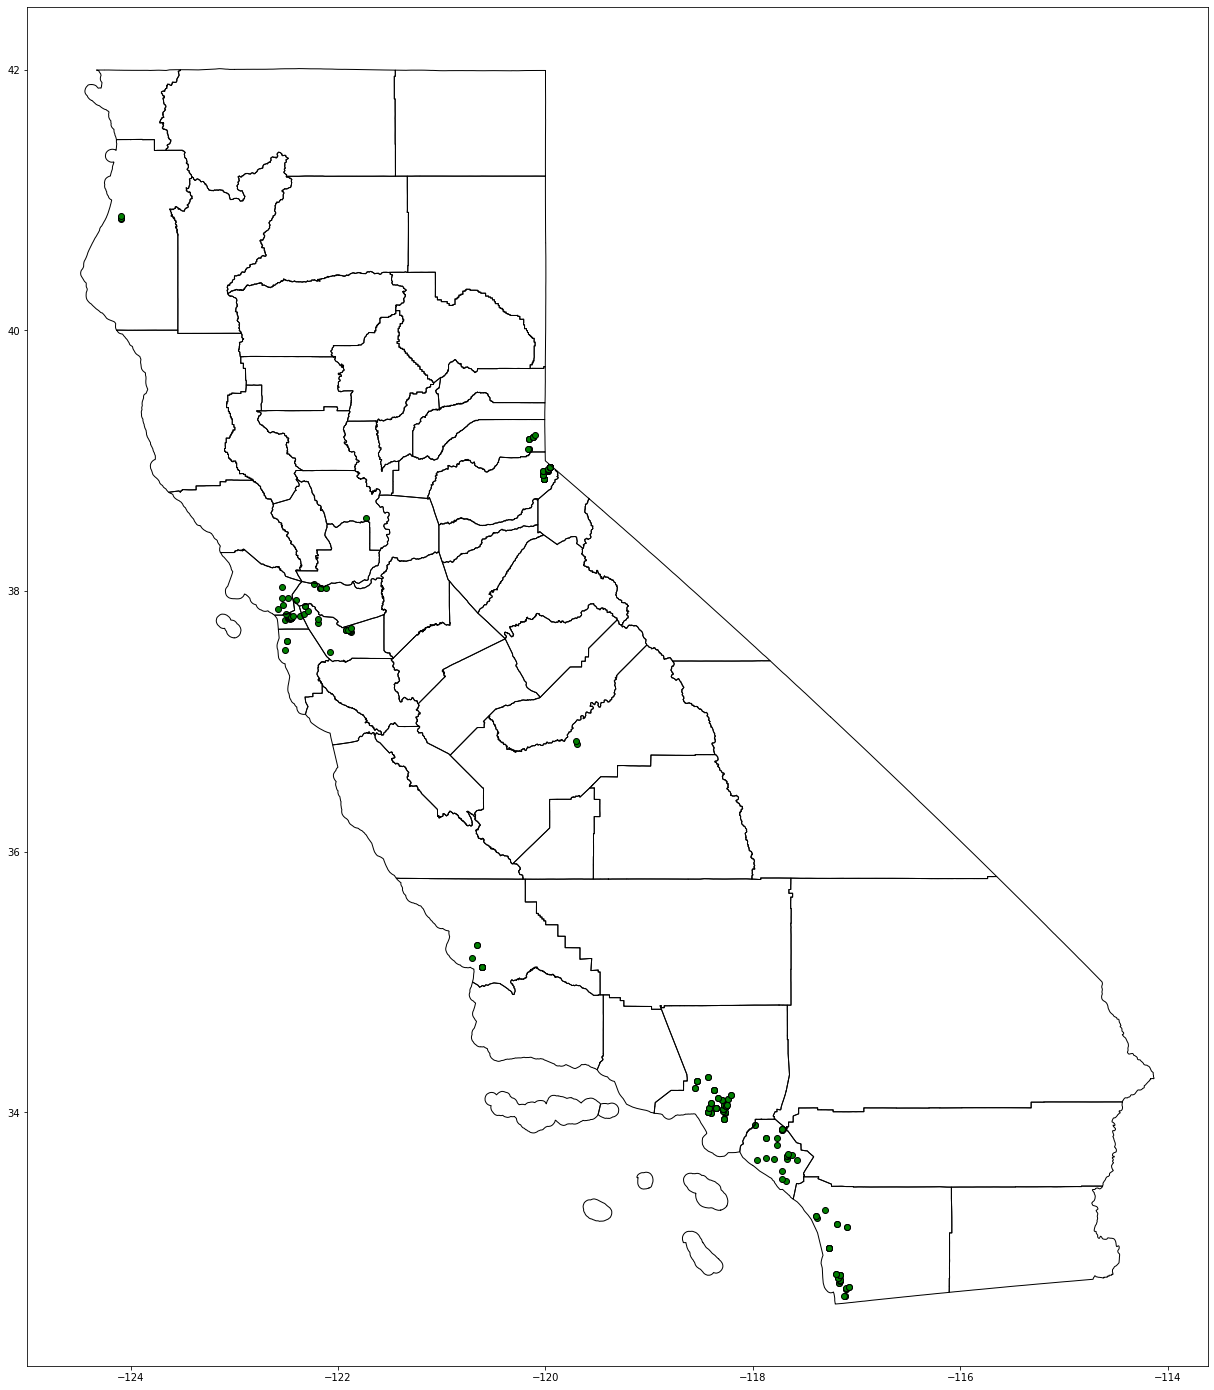

In [27]:
# visualize 
fig, ax = plt.subplots(figsize = (30,25)) 
gdf1.plot(ax=ax,color="green",edgecolor='k',linewidth = 1)
ca_boundary1.plot(color="none",edgecolor='k',linewidth = 1,ax=ax) #Use your second dataframe

In [28]:
# read the urban area shape file
ua=gpd.read_file('C:/UC Berkeley Project Backup/Bike_ped Exposure Model Project/Urban Area_shape file/data/2010_adjusted_urban_area.shp')
ua.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [29]:
# do the spatial join with eco valid counters
df19_urban=gpd.sjoin(gdf1,ua)
df19_urban=df19_urban.drop(['UACE10','NAME10','UATYP10','INTPTLAT10','INTPTLON10','geometry'],axis=1)
df19_urban['location']='urban'
df19_urban.shape

(259, 17)

In [30]:
# get the counters in rural area
df20_rural = gdf1.merge(df19_urban, indicator=True, how='outer').query('_merge != "both"').drop('_merge', 1)
df20_rural['location']='rural'
df20_rural.shape

(15, 18)

In [31]:
df20_rural=df20_rural.loc[df20_rural['latitude']>0]
df20_rural.shape

(15, 18)

In [32]:
# Now combine rural and urban 
df21=pd.concat([df19_urban,df20_rural],axis=0)
df21.head()

,index,ID,year,month,day,weekno,dayofweek,weekday_Status,starttime,latitude,longitude,counts,Day of Week,Week Day Status,day_night,index_right,location,geometry
946728,946728,03577,2018,1,1,1,0,0,00:00:00,32.59,-117.11,0.00,Monday,Week Day,night,121.00,urban,None
3225888,3225888,19211,2018,1,1,1,0,0,00:00:00,32.59,-117.11,0.00,Monday,Week Day,night,121.00,urban,None
2770056,2770056,14096,2018,1,1,1,0,0,00:00:00,32.59,-117.12,0.00,Monday,Week Day,night,121.00,urban,None
2629800,2629800,13761,2018,1,1,1,0,0,00:00:00,32.64,-117.10,1.00,Monday,Week Day,night,121.00,urban,None
4733640,4733640,25253,2018,1,1,1,0,0,00:00:00,32.64,-117.10,0.00,Monday,Week Day,night,121.00,urban,None


In [33]:
# we do not need all the columns as we have already those with the main data frame, we will select just id and location
df22=df21[['ID','location']]

In [34]:
# Return this location with orginal dataframe
df18=pd.merge(df18,df22, left_on=['ID'],right_on=['ID'], how='inner')
df18.shape

(9607536, 16)

In [35]:
# check the availability of the count before QA/QC
Valid_day0=pd.DataFrame({'Daily_volume_before_cleaning':df18.groupby(['ID','year','month','day'])['counts'].sum()}).reset_index()
Days_count=pd.DataFrame({'Days_count':Valid_day0.groupby(['ID','year','month'])['day'].count()}).reset_index()
cols=["year","month","day"]
Valid_day0['date'] = Valid_day0[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
Valid_day0['date'] = pd.to_datetime(Valid_day0['date'], errors='coerce')
Valid_day0['days_in_month'] = Valid_day0['date'].dt.days_in_month
count_validation=pd.merge(Valid_day0,Days_count, left_on=['ID','year','month'], right_on=['ID','year','month'], how='inner')
count_validation.head()

,ID,year,month,day,Daily_volume_before_cleaning,date,days_in_month,Days_count
0,00572,2018,1,1,340.00,2018-01-01,31,31
1,00572,2018,1,2,98.00,2018-01-02,31,31
2,00572,2018,1,3,138.00,2018-01-03,31,31
3,00572,2018,1,4,89.00,2018-01-04,31,31
4,00572,2018,1,5,57.00,2018-01-05,31,31


In [36]:
count_validation['Daily_volume_before_cleaning'].describe()

count   400314.00
mean       380.57
std       5734.79
min          0.00
25%          0.00
50%          0.00
75%         38.00
max     481622.00
Name: Daily_volume_before_cleaning, dtype: float64

In [37]:
count_validation1=count_validation.loc[count_validation['days_in_month']==count_validation['Days_count']]
count_validation1.shape

(400314, 8)

In [38]:
count_validation.shape, Valid_day0.shape, Days_count.shape

((400314, 8), (400314, 7), (13152, 4))

In [39]:
df18.head()

,index,ID,year,month,day,weekno,dayofweek,weekday_Status,starttime,latitude,longitude,counts,Day of Week,Week Day Status,day_night,location
0,0,00572,2018,1,1,1,0,0,00:00:00,37.80,-122.47,0.00,Monday,Week Day,night,urban
1,1,00572,2018,1,1,1,0,0,01:00:00,37.80,-122.47,0.00,Monday,Week Day,night,urban
2,2,00572,2018,1,1,1,0,0,02:00:00,37.80,-122.47,0.00,Monday,Week Day,night,urban
3,3,00572,2018,1,1,1,0,0,03:00:00,37.80,-122.47,0.00,Monday,Week Day,night,urban
4,4,00572,2018,1,1,1,0,0,04:00:00,37.80,-122.47,0.00,Monday,Week Day,night,urban


In [40]:
# count rural vs urban counters by year
df18.groupby(['year', 'location'])['ID'].nunique()

year  location
2018  rural        15
      urban       259
2019  rural        15
      urban       259
2020  rural        15
      urban       259
2021  rural        15
      urban       259
Name: ID, dtype: int64

In [41]:
df18.head()

,index,ID,year,month,day,weekno,dayofweek,weekday_Status,starttime,latitude,longitude,counts,Day of Week,Week Day Status,day_night,location
0,0,00572,2018,1,1,1,0,0,00:00:00,37.80,-122.47,0.00,Monday,Week Day,night,urban
1,1,00572,2018,1,1,1,0,0,01:00:00,37.80,-122.47,0.00,Monday,Week Day,night,urban
2,2,00572,2018,1,1,1,0,0,02:00:00,37.80,-122.47,0.00,Monday,Week Day,night,urban
3,3,00572,2018,1,1,1,0,0,03:00:00,37.80,-122.47,0.00,Monday,Week Day,night,urban
4,4,00572,2018,1,1,1,0,0,04:00:00,37.80,-122.47,0.00,Monday,Week Day,night,urban


In [42]:
# save this data
# save this process clean data
#df18.to_csv('C:/UC Berkeley Project Backup/AT Census/Processed Data/Eco_combined_data_rural_vs_urban_before_QA_QC.csv')

# run QA and QC

In [43]:
# list of criteria for QA and QC is below-
# Consecutive zeros lasting at least 48 hours
# Morning Peak (7-10 am), Early Afternoon peak (12-1 pm), and Evening Peak(5-7 pm) Hourly volume  is greater than 2,100
#  off peak time hourly volume greater than 1000
# Day time volume> nigh time volume
# Daily volume is greater than 9,000
# Consider daily counts valid if at least 22 valid hours are available.
# Consider months valid if at least one valid daily count for each day of the week (Sun-Sat).
# Consider counters “full-year” for AADBT calculation if they include 10 or more valid months of data. 

In [44]:
df18['starttime'].max()

'23:00:00'

In [45]:
# Morning Peak (7-10 am), Early Afternoon peak (12-1 pm), and Evening Peak(5-7 pm) Hourly volume  is greater than 2,100
peak_data1=df18[(df18['starttime']=='07:00:00') ]
peak_data2=df18[(df18['starttime']=='08:00:00') ]
peak_data3=df18[(df18['starttime']=='09:00:00') ]
peak_data4=df18[(df18['starttime']=='10:00:00') ]
peak_data5=df18[(df18['starttime']=='11:00:00') ]
peak_data6=df18[(df18['starttime']=='12:00:00') ]
peak_data7=df18[(df18['starttime']=='13:00:00') ]
peak_data8=df18[(df18['starttime']=='14:00:00')]
peak_data9=df18[(df18['starttime']=='15:00:00')]
peak_data10=df18[(df18['starttime']=='16:00:00')]
peak_data11=df18[(df18['starttime']=='17:00:00')]
peak_data12=df18[(df18['starttime']=='18:00:00')]
peak_data13=df18[(df18['starttime']=='19:00:00')]
peak_data=pd.concat([peak_data1,peak_data2,peak_data3,peak_data4,peak_data5,peak_data6,peak_data7,peak_data8,peak_data9,peak_data10,peak_data11,peak_data12,peak_data13],axis=0)
peak_data.head()
#df18.head()

,index,ID,year,month,day,weekno,dayofweek,weekday_Status,starttime,latitude,longitude,counts,Day of Week,Week Day Status,day_night,location
7,7,00572,2018,1,1,1,0,0,07:00:00,37.80,-122.47,1.00,Monday,Week Day,night,urban
31,31,00572,2018,1,2,1,1,0,07:00:00,37.80,-122.47,4.00,Tuesday,Week Day,night,urban
55,55,00572,2018,1,3,1,2,0,07:00:00,37.80,-122.47,2.00,Wednesday,Week Day,night,urban
79,79,00572,2018,1,4,1,3,0,07:00:00,37.80,-122.47,6.00,Thursday,Week Day,night,urban
103,103,00572,2018,1,5,1,4,0,07:00:00,37.80,-122.47,4.00,Friday,Week Day,night,urban


In [68]:
peak_data['counts'].describe()

count   5204082.00
mean         22.06
std         306.07
min           0.00
25%           0.00
50%           0.00
75%           1.00
max       24635.00
Name: counts, dtype: float64

In [79]:
check=peak_data.loc[peak_data['counts']>20000]
check.head()

,index,ID,year,month,day,weekno,dayofweek,weekday_Status,starttime,latitude,longitude,counts,Day of Week,Week Day Status,day_night,location,Flag
6747967,7484311,56482,2019,10,16,42,2,0,07:00:00,32.72,-117.16,22142.00,Wednesday,Week Day,night,urban,0
6747991,7484335,56482,2019,10,17,42,3,0,07:00:00,32.72,-117.16,22364.00,Thursday,Week Day,night,urban,0
6748015,7484359,56482,2019,10,18,42,4,0,07:00:00,32.72,-117.16,21940.00,Friday,Week Day,night,urban,0
6748039,7484383,56482,2019,10,19,42,5,1,07:00:00,32.72,-117.16,24238.00,Saturday,Weekend,night,urban,0
6748063,7484407,56482,2019,10,20,42,6,1,07:00:00,32.72,-117.16,24635.00,Sunday,Weekend,night,urban,0


In [80]:
# define function to flag the data
def peak_flag(Count):
    if Count>  24635:
        return 'flag'
    else:
        return 0
peak_data['Flag']=peak_data.apply(lambda row:peak_flag(row['counts']),axis=1)
peak_data.head()

,index,ID,year,month,day,weekno,dayofweek,weekday_Status,starttime,latitude,longitude,counts,Day of Week,Week Day Status,day_night,location,Flag
7,7,00572,2018,1,1,1,0,0,07:00:00,37.80,-122.47,1.00,Monday,Week Day,night,urban,0
31,31,00572,2018,1,2,1,1,0,07:00:00,37.80,-122.47,4.00,Tuesday,Week Day,night,urban,0
55,55,00572,2018,1,3,1,2,0,07:00:00,37.80,-122.47,2.00,Wednesday,Week Day,night,urban,0
79,79,00572,2018,1,4,1,3,0,07:00:00,37.80,-122.47,6.00,Thursday,Week Day,night,urban,0
103,103,00572,2018,1,5,1,4,0,07:00:00,37.80,-122.47,4.00,Friday,Week Day,night,urban,0


In [81]:
# get non-peak data
non_peak_data = df18.merge(peak_data, indicator=True, how='outer').query('_merge != "both"').drop('_merge', 1)
non_peak_data.shape

(4403454, 17)

In [82]:
non_peak_data.loc[non_peak_data['counts']>20000]

,index,ID,year,month,day,weekno,dayofweek,weekday_Status,starttime,latitude,longitude,counts,Day of Week,Week Day Status,day_night,location,Flag
6747956,7484300,56482,2019,10,15,42,1,0,20:00:00,32.72,-117.16,23178.00,Tuesday,Week Day,night,urban,NaN
6747957,7484301,56482,2019,10,15,42,1,0,21:00:00,32.72,-117.16,23920.00,Tuesday,Week Day,night,urban,NaN
6747958,7484302,56482,2019,10,15,42,1,0,22:00:00,32.72,-117.16,24346.00,Tuesday,Week Day,night,urban,NaN
6747959,7484303,56482,2019,10,15,42,1,0,23:00:00,32.72,-117.16,24970.00,Tuesday,Week Day,night,urban,NaN
6747960,7484304,56482,2019,10,16,42,2,0,00:00:00,32.72,-117.16,20346.00,Wednesday,Week Day,night,urban,NaN
6747966,7484310,56482,2019,10,16,42,2,0,06:00:00,32.72,-117.16,24324.00,Wednesday,Week Day,night,urban,NaN
6747980,7484324,56482,2019,10,16,42,2,0,20:00:00,32.72,-117.16,23248.00,Wednesday,Week Day,night,urban,NaN
6747981,7484325,56482,2019,10,16,42,2,0,21:00:00,32.72,-117.16,23428.00,Wednesday,Week Day,night,urban,NaN
6747982,7484326,56482,2019,10,16,42,2,0,22:00:00,32.72,-117.16,24246.00,Wednesday,Week Day,night,urban,NaN
6747983,7484327,56482,2019,10,16,42,2,0,23:00:00,32.72,-117.16,24231.00,Wednesday,Week Day,night,urban,NaN


In [83]:
non_peak_data['counts'].describe()

count   4403454.00
mean          8.52
std         220.34
min           0.00
25%           0.00
50%           0.00
75%           0.00
max       24970.00
Name: counts, dtype: float64

In [84]:
def off_peak_flag(Count):
    if Count> 24970:
        return 'flag'
    else:
        return 0
non_peak_data['Flag']=non_peak_data.apply(lambda row:off_peak_flag(row['counts']),axis=1)

In [85]:
# combine peak and non-peak data for next steps
hr_vol=pd.concat([peak_data,non_peak_data],axis=0)
hr_vol2=hr_vol.loc[hr_vol['Flag']==0]
hr_vol2.head()

,index,ID,year,month,day,weekno,dayofweek,weekday_Status,starttime,latitude,longitude,counts,Day of Week,Week Day Status,day_night,location,Flag
7,7,00572,2018,1,1,1,0,0,07:00:00,37.80,-122.47,1.00,Monday,Week Day,night,urban,0
31,31,00572,2018,1,2,1,1,0,07:00:00,37.80,-122.47,4.00,Tuesday,Week Day,night,urban,0
55,55,00572,2018,1,3,1,2,0,07:00:00,37.80,-122.47,2.00,Wednesday,Week Day,night,urban,0
79,79,00572,2018,1,4,1,3,0,07:00:00,37.80,-122.47,6.00,Thursday,Week Day,night,urban,0
103,103,00572,2018,1,5,1,4,0,07:00:00,37.80,-122.47,4.00,Friday,Week Day,night,urban,0


In [86]:
# save this hourly clean volume
#hr_vol2.to_csv('C:/UC Berkeley Project Backup/AT Census/Processed Data/eco_hourly_clean_volume.csv')

In [87]:
# assign duration of each hr volume
hr_vol2['duration1']=1
hr_vol2.head()

,index,ID,year,month,day,weekno,dayofweek,weekday_Status,starttime,latitude,longitude,counts,Day of Week,Week Day Status,day_night,location,Flag,duration1
7,7,00572,2018,1,1,1,0,0,07:00:00,37.80,-122.47,1.00,Monday,Week Day,night,urban,0,1
31,31,00572,2018,1,2,1,1,0,07:00:00,37.80,-122.47,4.00,Tuesday,Week Day,night,urban,0,1
55,55,00572,2018,1,3,1,2,0,07:00:00,37.80,-122.47,2.00,Wednesday,Week Day,night,urban,0,1
79,79,00572,2018,1,4,1,3,0,07:00:00,37.80,-122.47,6.00,Thursday,Week Day,night,urban,0,1
103,103,00572,2018,1,5,1,4,0,07:00:00,37.80,-122.47,4.00,Friday,Week Day,night,urban,0,1


In [88]:
# apply the night condition;Day time volume> nigh time volume
#hr_vol3=pd.DataFrame({'day_night_volume': hr_vol2.groupby(['ID',"year","month",'day','Day of Week','weekno','day_night'])['Bicycle Count'].sum()}).reset_index()
hr_vol31=hr_vol2.loc[hr_vol2['day_night']=='day']
hr_vol31=pd.DataFrame({'day_volume': hr_vol31.groupby(['ID',"year","month",'day','Day of Week','weekno','day_night'])['counts'].sum()}).reset_index()
hr_vol32=hr_vol2.loc[hr_vol2['day_night']=='night']
hr_vol32=pd.DataFrame({'night_volume': hr_vol32.groupby(['ID',"year","month",'day','Day of Week','weekno','day_night'])['counts'].sum()}).reset_index()
day_night_vol=pd.merge(hr_vol32,hr_vol31,left_on=['ID',"year","month",'day','Day of Week','weekno'],right_on=['ID',"year","month",'day','Day of Week','weekno'],how='inner')
day_night_vol.head()  

,ID,year,month,day,Day of Week,weekno,day_night_x,night_volume,day_night_y,day_volume
0,00572,2018,1,1,Monday,1,night,2.00,day,338.00
1,00572,2018,1,2,Tuesday,1,night,7.00,day,91.00
2,00572,2018,1,3,Wednesday,1,night,3.00,day,135.00
3,00572,2018,1,4,Thursday,1,night,7.00,day,82.00
4,00572,2018,1,5,Friday,1,night,5.00,day,52.00


In [89]:
day_night_vol.shape

(400314, 10)

In [90]:
# Now flag it
def flg(day_volume, night_volume):
    if day_volume>=night_volume:
        return 0
    else:
        return 'flag'
day_night_vol['flag']=day_night_vol.apply(lambda row:flg(row['day_volume'],row['night_volume']),axis=1)   

In [91]:
# valid data after applying the condition
day_night_vol1=day_night_vol.loc[day_night_vol['flag']==0]
day_night_vol1.shape

(397466, 11)

In [92]:
# invalid data that was flagged
day_night_vol11=day_night_vol.loc[day_night_vol['flag']=='flag']
day_night_vol11.shape

(2848, 11)

In [93]:
day_night_vol['daily_volume']=day_night_vol['night_volume']+day_night_vol['day_volume']
day_night_vol.head()

,ID,year,month,day,Day of Week,weekno,day_night_x,night_volume,day_night_y,day_volume,flag,daily_volume
0,00572,2018,1,1,Monday,1,night,2.00,day,338.00,0,340.00
1,00572,2018,1,2,Tuesday,1,night,7.00,day,91.00,0,98.00
2,00572,2018,1,3,Wednesday,1,night,3.00,day,135.00,0,138.00
3,00572,2018,1,4,Thursday,1,night,7.00,day,82.00,0,89.00
4,00572,2018,1,5,Friday,1,night,5.00,day,52.00,0,57.00


In [94]:
daily_vol3=pd.DataFrame({'Daily_volume': hr_vol2.groupby(['ID',"year","month",'day','Day of Week','weekno'])['counts'].sum()}).reset_index()
daily_vol4=pd.DataFrame({'sum_hr': hr_vol2.groupby(['ID',"year","month",'day','Day of Week','weekno'])['duration1'].sum()}).reset_index()
daily_vol5=pd.merge(daily_vol3,daily_vol4,left_on=['ID',"year","month",'day','Day of Week','weekno'],right_on=['ID',"year","month",'day','Day of Week','weekno'],how='inner')
daily_vol5['cum_Daily_volume'] = daily_vol3['Daily_volume'].groupby(daily_vol3['ID']).cumsum()
daily_vol5['cum_hr'] = daily_vol5['sum_hr'].groupby(daily_vol5['ID']).cumsum()
daily_vol5.head()

,ID,year,month,day,Day of Week,weekno,Daily_volume,sum_hr,cum_Daily_volume,cum_hr
0,00572,2018,1,1,Monday,1,340.00,24,340.00,24
1,00572,2018,1,2,Tuesday,1,98.00,24,438.00,48
2,00572,2018,1,3,Wednesday,1,138.00,24,576.00,72
3,00572,2018,1,4,Thursday,1,89.00,24,665.00,96
4,00572,2018,1,5,Friday,1,57.00,24,722.00,120


In [95]:
daily_vol6=pd.merge(daily_vol5,day_night_vol1,left_on=['ID',"year","month",'day','Day of Week','weekno'],right_on=['ID',"year","month",'day','Day of Week','weekno'],how='inner')

In [96]:
daily_vol6['Daily_volume'].describe()

count   397466.00
mean       333.65
std       5067.61
min          0.00
25%          0.00
50%          0.00
75%         35.00
max     481622.00
Name: Daily_volume, dtype: float64

In [65]:
# Export this raw daily volume
#daily_vol6.to_csv('C:/UC Berkeley Project Backup/AT Census/Processed Data/eco_daily_raw_volume.csv')

In [97]:
# Check if daily volume is greater than 9000
daily_vol7=daily_vol6.loc[daily_vol6['Daily_volume']<481623]
#Consider daily counts valid if at least 22 valid hours are available.
daily_vol7=daily_vol6.loc[daily_vol6['cum_hr']>21]

In [100]:
#Consecutive zeros lasting at least 48 hours, flag it
def flag (cum_hr,Daily_volume):
    if cum_hr>=48 and Daily_volume==0:
         return 'flag'
    else:
         return 0

daily_vol7['Flag']=daily_vol7.apply(lambda row: flag(row['cum_hr'],row['Daily_volume']),axis=1)
daily_vol7.head()

,ID,year,month,day,Day of Week,weekno,Daily_volume,sum_hr,cum_Daily_volume,cum_hr,day_night_x,night_volume,day_night_y,day_volume,flag,Flag
0,00572,2018,1,1,Monday,1,340.00,24,340.00,24,night,2.00,day,338.00,0,0
1,00572,2018,1,2,Tuesday,1,98.00,24,438.00,48,night,7.00,day,91.00,0,0
2,00572,2018,1,3,Wednesday,1,138.00,24,576.00,72,night,3.00,day,135.00,0,0
3,00572,2018,1,4,Thursday,1,89.00,24,665.00,96,night,7.00,day,82.00,0,0
4,00572,2018,1,5,Friday,1,57.00,24,722.00,120,night,5.00,day,52.00,0,0


In [101]:
# Consider daily counts valid if at least 22 valid hours are available.
daily_vol8=daily_vol7.loc[daily_vol7['Flag']==0]
daily_vol8.head()

,ID,year,month,day,Day of Week,weekno,Daily_volume,sum_hr,cum_Daily_volume,cum_hr,day_night_x,night_volume,day_night_y,day_volume,flag,Flag
0,00572,2018,1,1,Monday,1,340.00,24,340.00,24,night,2.00,day,338.00,0,0
1,00572,2018,1,2,Tuesday,1,98.00,24,438.00,48,night,7.00,day,91.00,0,0
2,00572,2018,1,3,Wednesday,1,138.00,24,576.00,72,night,3.00,day,135.00,0,0
3,00572,2018,1,4,Thursday,1,89.00,24,665.00,96,night,7.00,day,82.00,0,0
4,00572,2018,1,5,Friday,1,57.00,24,722.00,120,night,5.00,day,52.00,0,0


In [102]:
#daily_vol8=daily_vol7

In [103]:
#daily_vol8.shape, daily_vol7.shape

In [104]:
# Consider months valid if at least one valid daily count for each day of the week (Sun-Sat).
# daily_vol9=pd.DataFrame({'no_of_days_weekly_data_collected':daily_vol8.groupby(['ID','year','month','weekno'])['weekno'].count()}).reset_index()
# daily_vol9.head()

In [105]:
#daily_vol9=daily_vol9.loc[daily_vol9['no_of_days_weekly_data_collected']==7]

In [106]:
#daily_vol9.shape

In [107]:
#daily_vol10=pd.merge(daily_vol8,daily_vol9,left_on=['ID',"year","month",'weekno'],right_on=['ID',"year","month",'weekno'],how='inner')
cols=["year","month","day"]
daily_vol8['date'] = daily_vol8[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
daily_vol8['date'] = pd.to_datetime(daily_vol8['date'], errors='coerce')
daily_vol8['days_in_month'] = daily_vol8['date'].dt.days_in_month
daily_vol8.head()

C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_14276\2589847945.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_vol8['date'] = daily_vol8[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_14276\2589847945.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_vol8['date'] = pd.to_datetime(daily_vol8['date'], errors='coerce')
C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_14276\2589847945.py:5: SettingWithCopyWarni

,ID,year,month,day,Day of Week,weekno,Daily_volume,sum_hr,cum_Daily_volume,cum_hr,day_night_x,night_volume,day_night_y,day_volume,flag,Flag,date,days_in_month
0,00572,2018,1,1,Monday,1,340.00,24,340.00,24,night,2.00,day,338.00,0,0,2018-01-01,31
1,00572,2018,1,2,Tuesday,1,98.00,24,438.00,48,night,7.00,day,91.00,0,0,2018-01-02,31
2,00572,2018,1,3,Wednesday,1,138.00,24,576.00,72,night,3.00,day,135.00,0,0,2018-01-03,31
3,00572,2018,1,4,Thursday,1,89.00,24,665.00,96,night,7.00,day,82.00,0,0,2018-01-04,31
4,00572,2018,1,5,Friday,1,57.00,24,722.00,120,night,5.00,day,52.00,0,0,2018-01-05,31


In [109]:
daily_vol8.shape

(112375, 18)

In [110]:
# No of days data collected 
Valid_day=pd.DataFrame({'no_of_days_data_collected':daily_vol8.groupby(['ID','year','month'])['day'].count()}).reset_index()
Valid_day.head()

,ID,year,month,no_of_days_data_collected
0,00572,2018,1,31
1,00572,2018,2,28
2,00572,2018,3,31
3,00572,2018,4,30
4,00572,2018,5,31


In [111]:
Valid_day['no_of_days_data_collected'].unique()

array([31, 28, 30, 29,  1, 27, 25, 20, 26, 18, 14,  5,  7, 16, 12,  4, 15,
        8, 11, 22, 24, 13, 17,  9, 23, 21, 19,  3,  2, 10,  6],
      dtype=int64)

In [112]:
daily_vol9=pd.merge(daily_vol8,Valid_day, left_on=['ID','year','month'], right_on=['ID','year','month'], how='inner')
daily_vol9.shape

(112375, 19)

In [113]:
daily_vol10=daily_vol9.loc[daily_vol9['no_of_days_data_collected']>=daily_vol9['days_in_month']]
daily_vol10.head(4)

,ID,year,month,day,Day of Week,weekno,Daily_volume,sum_hr,cum_Daily_volume,cum_hr,day_night_x,night_volume,day_night_y,day_volume,flag,Flag,date,days_in_month,no_of_days_data_collected
0,00572,2018,1,1,Monday,1,340.00,24,340.00,24,night,2.00,day,338.00,0,0,2018-01-01,31,31
1,00572,2018,1,2,Tuesday,1,98.00,24,438.00,48,night,7.00,day,91.00,0,0,2018-01-02,31,31
2,00572,2018,1,3,Wednesday,1,138.00,24,576.00,72,night,3.00,day,135.00,0,0,2018-01-03,31,31
3,00572,2018,1,4,Thursday,1,89.00,24,665.00,96,night,7.00,day,82.00,0,0,2018-01-04,31,31


In [114]:
daily_vol10.groupby(['year'])['ID'].nunique()

year
2018     91
2019     89
2020     92
2021    123
Name: ID, dtype: int64

In [115]:
daily_vol10['days_in_month'].describe()

count   86620.00
mean       30.46
std         0.80
min        28.00
25%        30.00
50%        31.00
75%        31.00
max        31.00
Name: days_in_month, dtype: float64

In [116]:
# save the Daily Volume
daily_vol10.to_csv('C:/UC Berkeley Project Backup/AT Census/Pedestrain_Processed Data/eco_pedestrain_daily_volume_2019_2016_data_full_month.csv')

In [117]:
days_of_month=daily_vol10[['ID','year','month','days_in_month']]
days_of_month1=days_of_month.drop_duplicates(subset=['ID','year','month'],keep='first')
days_of_month1.head(4)

,ID,year,month,days_in_month
0,00572,2018,1,31
31,00572,2018,2,28
59,00572,2018,3,31
90,00572,2018,4,30


In [118]:
# Calculate Simple MADT
simp_madt=pd.DataFrame({'MTT':daily_vol10.groupby(['ID','year','month'])['Daily_volume'].sum()}).reset_index()
simp_madt1=pd.merge(simp_madt,days_of_month1,on=['ID','year','month'],how='inner')
simp_madt1['Simple_MADT']=simp_madt1['MTT']/simp_madt1['days_in_month']
simp_madt1.head()

,ID,year,month,MTT,days_in_month,Simple_MADT
0,00572,2018,1,5749.00,31,185.45
1,00572,2018,2,5968.00,28,213.14
2,00572,2018,3,7334.00,31,236.58
3,00572,2018,4,6767.00,30,225.57
4,00572,2018,5,6671.00,31,215.19


In [119]:
simp_madt.shape, simp_madt1.shape

((2846, 4), (2846, 6))

In [120]:
# Calculate AASHTO MADT
aashto_madt=pd.DataFrame({'AASHTO_WADT':daily_vol10.groupby(['ID','year','month','Day of Week'])['Daily_volume'].mean()}).reset_index()
aashto_madt1=pd.DataFrame({'AASHTO_MADT':aashto_madt.groupby(['ID','year','month'])['AASHTO_WADT'].mean()}).reset_index()
aashto_madt1.head(10)

,ID,year,month,AASHTO_MADT
0,00572,2018,1,188.97
1,00572,2018,2,213.14
2,00572,2018,3,235.55
3,00572,2018,4,221.25
4,00572,2018,5,220.44
5,00572,2018,6,232.93
6,00572,2018,7,213.84
7,00572,2018,8,214.64
8,00572,2018,9,234.35
9,00572,2018,10,259.74


In [121]:
# combine simple madt and aashto madt
madt=pd.merge(simp_madt1,aashto_madt1,on=['ID','year','month'],how='inner')
madt['diff']=madt['Simple_MADT']-madt['AASHTO_MADT']
madt.tail(20)

,ID,year,month,MTT,days_in_month,Simple_MADT,AASHTO_MADT,diff
2826,89286,2021,12,1305.00,31,42.10,42.86,-0.76
2827,90496,2021,8,546.00,31,17.61,17.49,0.13
2828,90496,2021,9,612.00,30,20.40,20.39,0.01
2829,90496,2021,11,461.00,30,15.37,15.69,-0.33
2830,90497,2021,8,964.00,31,31.10,30.94,0.15
2831,90497,2021,9,981.00,30,32.70,33.03,-0.33
2832,90497,2021,11,711.00,30,23.70,24.04,-0.34
2833,90927,2021,11,76258.00,30,2541.93,2537.97,3.96
2834,90928,2021,11,57183.00,30,1906.10,1904.00,2.10
2835,90941,2021,12,125715.00,31,4055.32,4037.84,17.49


In [128]:
madt['Simple_MADT'].describe()

count     2846.00
mean      1077.55
std       7770.33
min         12.71
25%        117.26
50%        244.71
75%        523.62
max     171353.77
Name: Simple_MADT, dtype: float64

In [123]:
def multiplot4_MADT(MOY_ind):
    d18=madt.loc[MOY_ind['year']==2018]
    d19=madt.loc[MOY_ind['year']==2019]
    d20=madt.loc[MOY_ind['year']==2020]
    d21=madt.loc[MOY_ind['year']==2021]
    import seaborn as sns

    sns.set(rc={'figure.figsize':(25,30)})
    sns.set(font_scale=2.0)
    import seaborn as sns


    fig, ax = plt.subplots(2,2)

    ax1 = sns.lineplot(x=d18['month'],y=d18['Simple_MADT'],hue=d18['ID'],
                       markers=True,marker="o", dashes=False,sort=True,ax=ax[0,0]) 
    plt.xticks(rotation = 'vertical')
    ax2 = sns.lineplot(x=d19['month'],y=d19['Simple_MADT'],hue=d19['ID'],
                       markers=True,marker="o", dashes=False,sort=True,ax=ax[0,1]) 
    plt.xticks(rotation = 'vertical')
    ax3 = sns.lineplot(x=d20['month'],y=d20['Simple_MADT'],hue=d20['ID'],
                       markers=True,marker="o", dashes=False,sort=True,ax=ax[1,0])
    plt.xticks(rotation = 'vertical')
    ax4 = sns.lineplot(x=d21['month'],y=d21['Simple_MADT'],hue=d21['ID'],
                       markers=True, marker="o", dashes=False,sort=True,ax=ax[1,1]) 
    ax1.set(ylim=(0, 10000))
    ax2.set(ylim=(0, 10000))
    ax3.set(ylim=(0, 10000))
    ax4.set(ylim=(0, 10000))
    ax1.get_legend().remove()
    ax2.get_legend().remove()
    ax3.get_legend().remove()
    ax4.get_legend().remove()
    ax1.title.set_text('2018 Simple_MADT')
    ax2.title.set_text('2019 Simple_MADT')
    ax3.title.set_text('2020 Simple_MADT')
    ax4.title.set_text('2021 Simple_MADT')
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
    plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)
    plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45)
    ax1.set_ylabel('Simple_MADT' )
    ax1.set_xlabel('month')
    ax2.set_ylabel('Simple_MADT' )
    ax2.set_xlabel('month')
    ax3.set_ylabel('Simple_MADT' )
    ax3.set_xlabel('month')
    ax4.set_ylabel('Simple_MADT' )
    ax4.set_xlabel('month')
    plt.show()

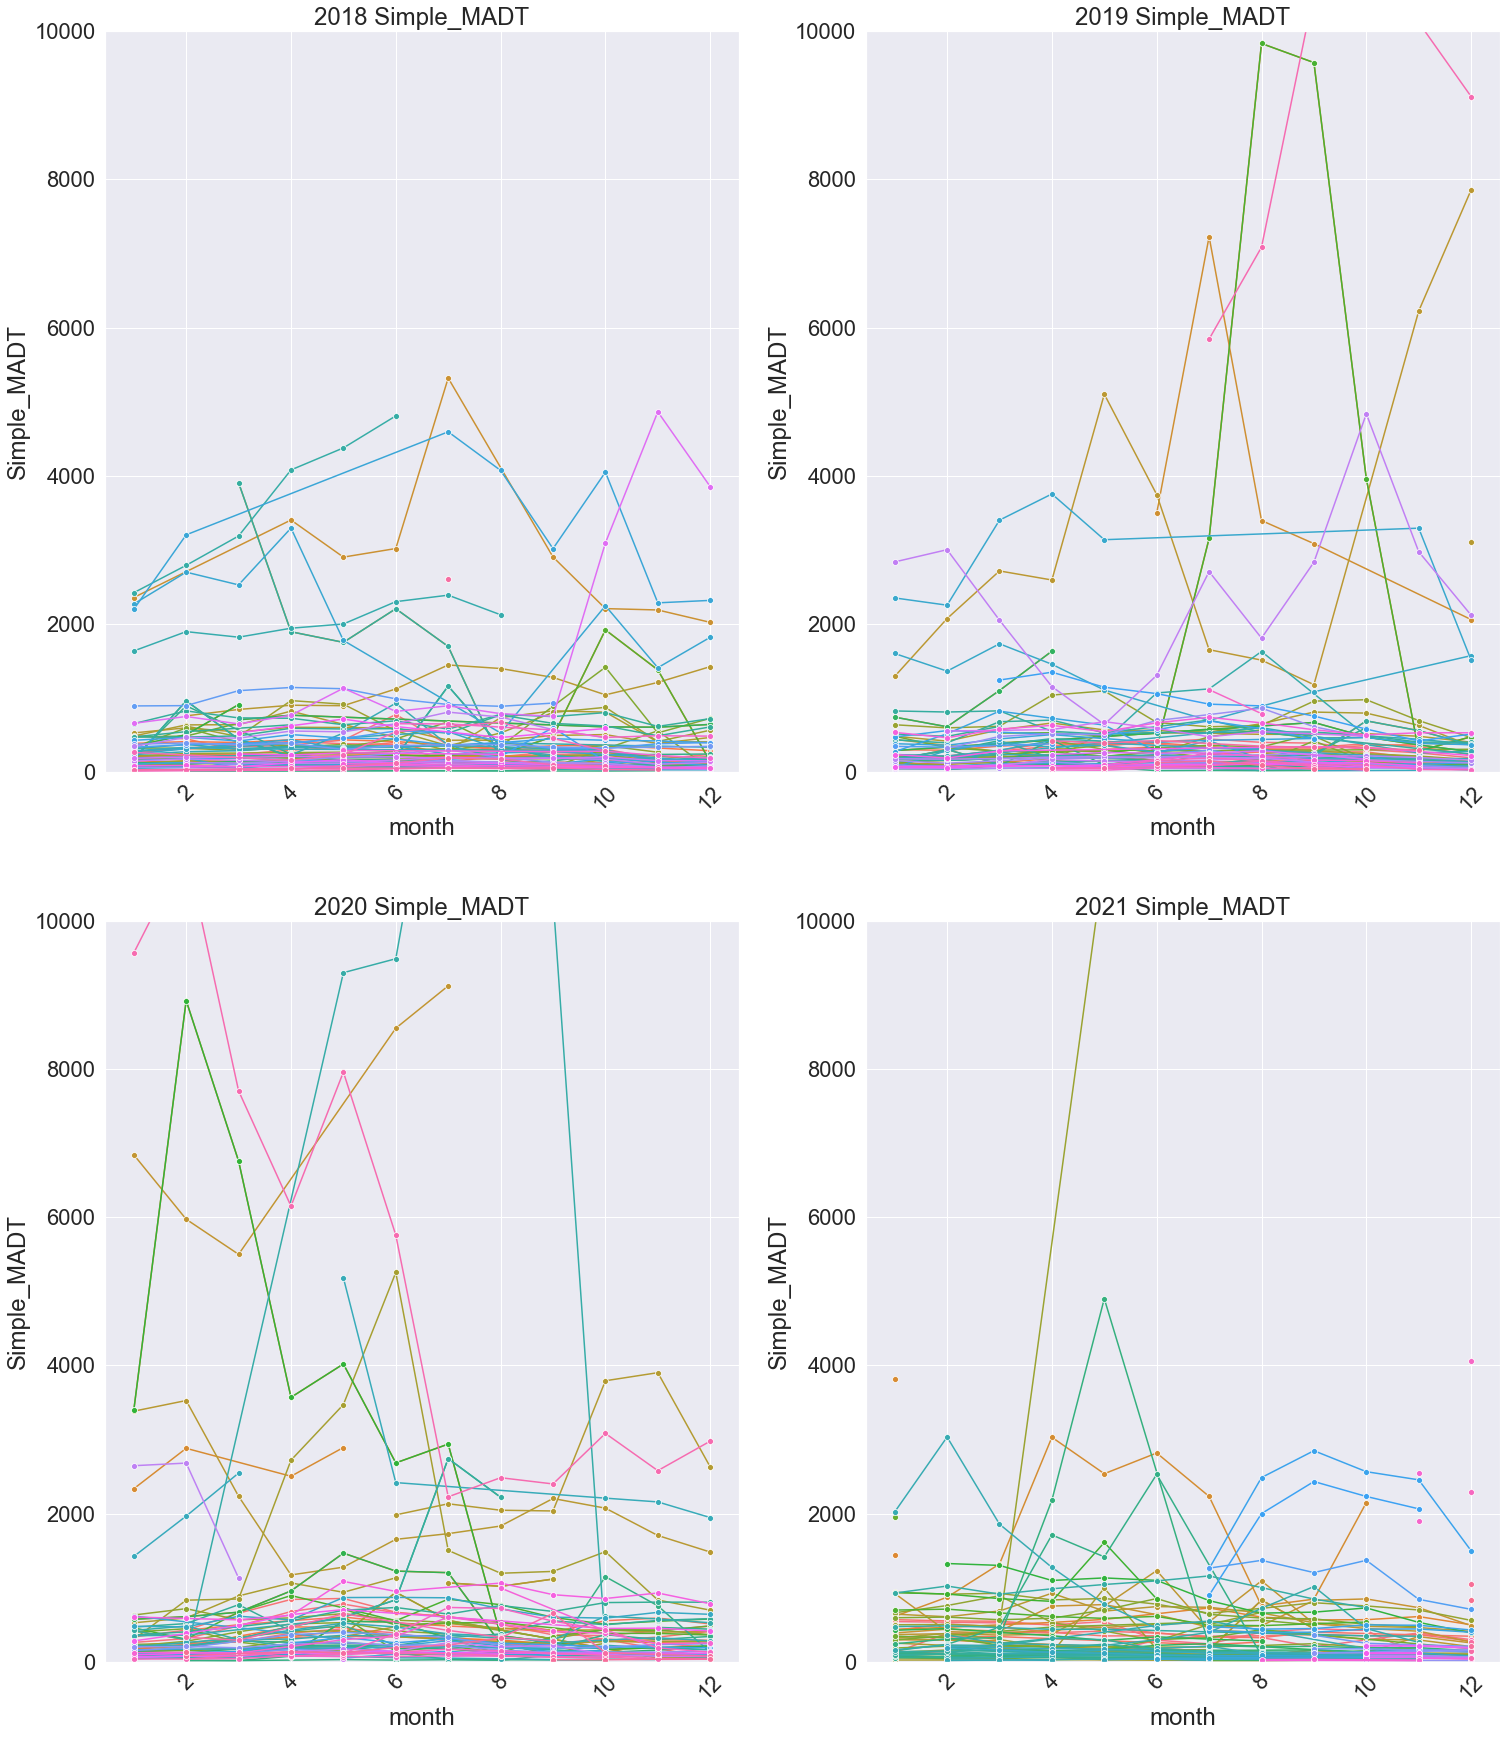

In [124]:
multiplot4_MADT(madt)

In [125]:
def multiplot4_MADT_AASHTO(MOY_ind):
    d18=madt.loc[MOY_ind['year']==2018]
    d19=madt.loc[MOY_ind['year']==2019]
    d20=madt.loc[MOY_ind['year']==2020]
    d21=madt.loc[MOY_ind['year']==2021]
    import seaborn as sns

    sns.set(rc={'figure.figsize':(25,30)})
    sns.set(font_scale=2.0)
    import seaborn as sns


    fig, ax = plt.subplots(2,2)

    ax1 = sns.lineplot(x=d18['month'],y=d18['AASHTO_MADT'],hue=d18['ID'],
                       markers=True,marker="o", dashes=False,sort=True,ax=ax[0,0]) 
    plt.xticks(rotation = 'vertical')
    ax2 = sns.lineplot(x=d19['month'],y=d19['AASHTO_MADT'],hue=d19['ID'],
                       markers=True,marker="o", dashes=False,sort=True,ax=ax[0,1]) 
    plt.xticks(rotation = 'vertical')
    ax3 = sns.lineplot(x=d20['month'],y=d20['AASHTO_MADT'],hue=d20['ID'],
                       markers=True,marker="o", dashes=False,sort=True,ax=ax[1,0])
    plt.xticks(rotation = 'vertical')
    ax4 = sns.lineplot(x=d21['month'],y=d21['AASHTO_MADT'],hue=d21['ID'],
                       markers=True, marker="o", dashes=False,sort=True,ax=ax[1,1]) 
    ax1.set(ylim=(0, 10000))
    ax2.set(ylim=(0, 10000))
    ax3.set(ylim=(0, 10000))
    ax4.set(ylim=(0, 10000))
    ax1.get_legend().remove()
    ax2.get_legend().remove()
    ax3.get_legend().remove()
    ax4.get_legend().remove()
    ax1.title.set_text('2018 AASHTO_MADT')
    ax2.title.set_text('2019 AASHTO_MADT')
    ax3.title.set_text('2020 AASHTO_MADT')
    ax4.title.set_text('2021 AASHTO_MADT')
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
    plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)
    plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45)
    ax1.set_ylabel('AASHTO_MADT' )
    ax1.set_xlabel('month')
    ax2.set_ylabel('AASHTO_MADT' )
    ax2.set_xlabel('month')
    ax3.set_ylabel('AASHTO_MADT' )
    ax3.set_xlabel('month')
    ax4.set_ylabel('AASHTO_MADT' )
    ax4.set_xlabel('month')
    plt.show()

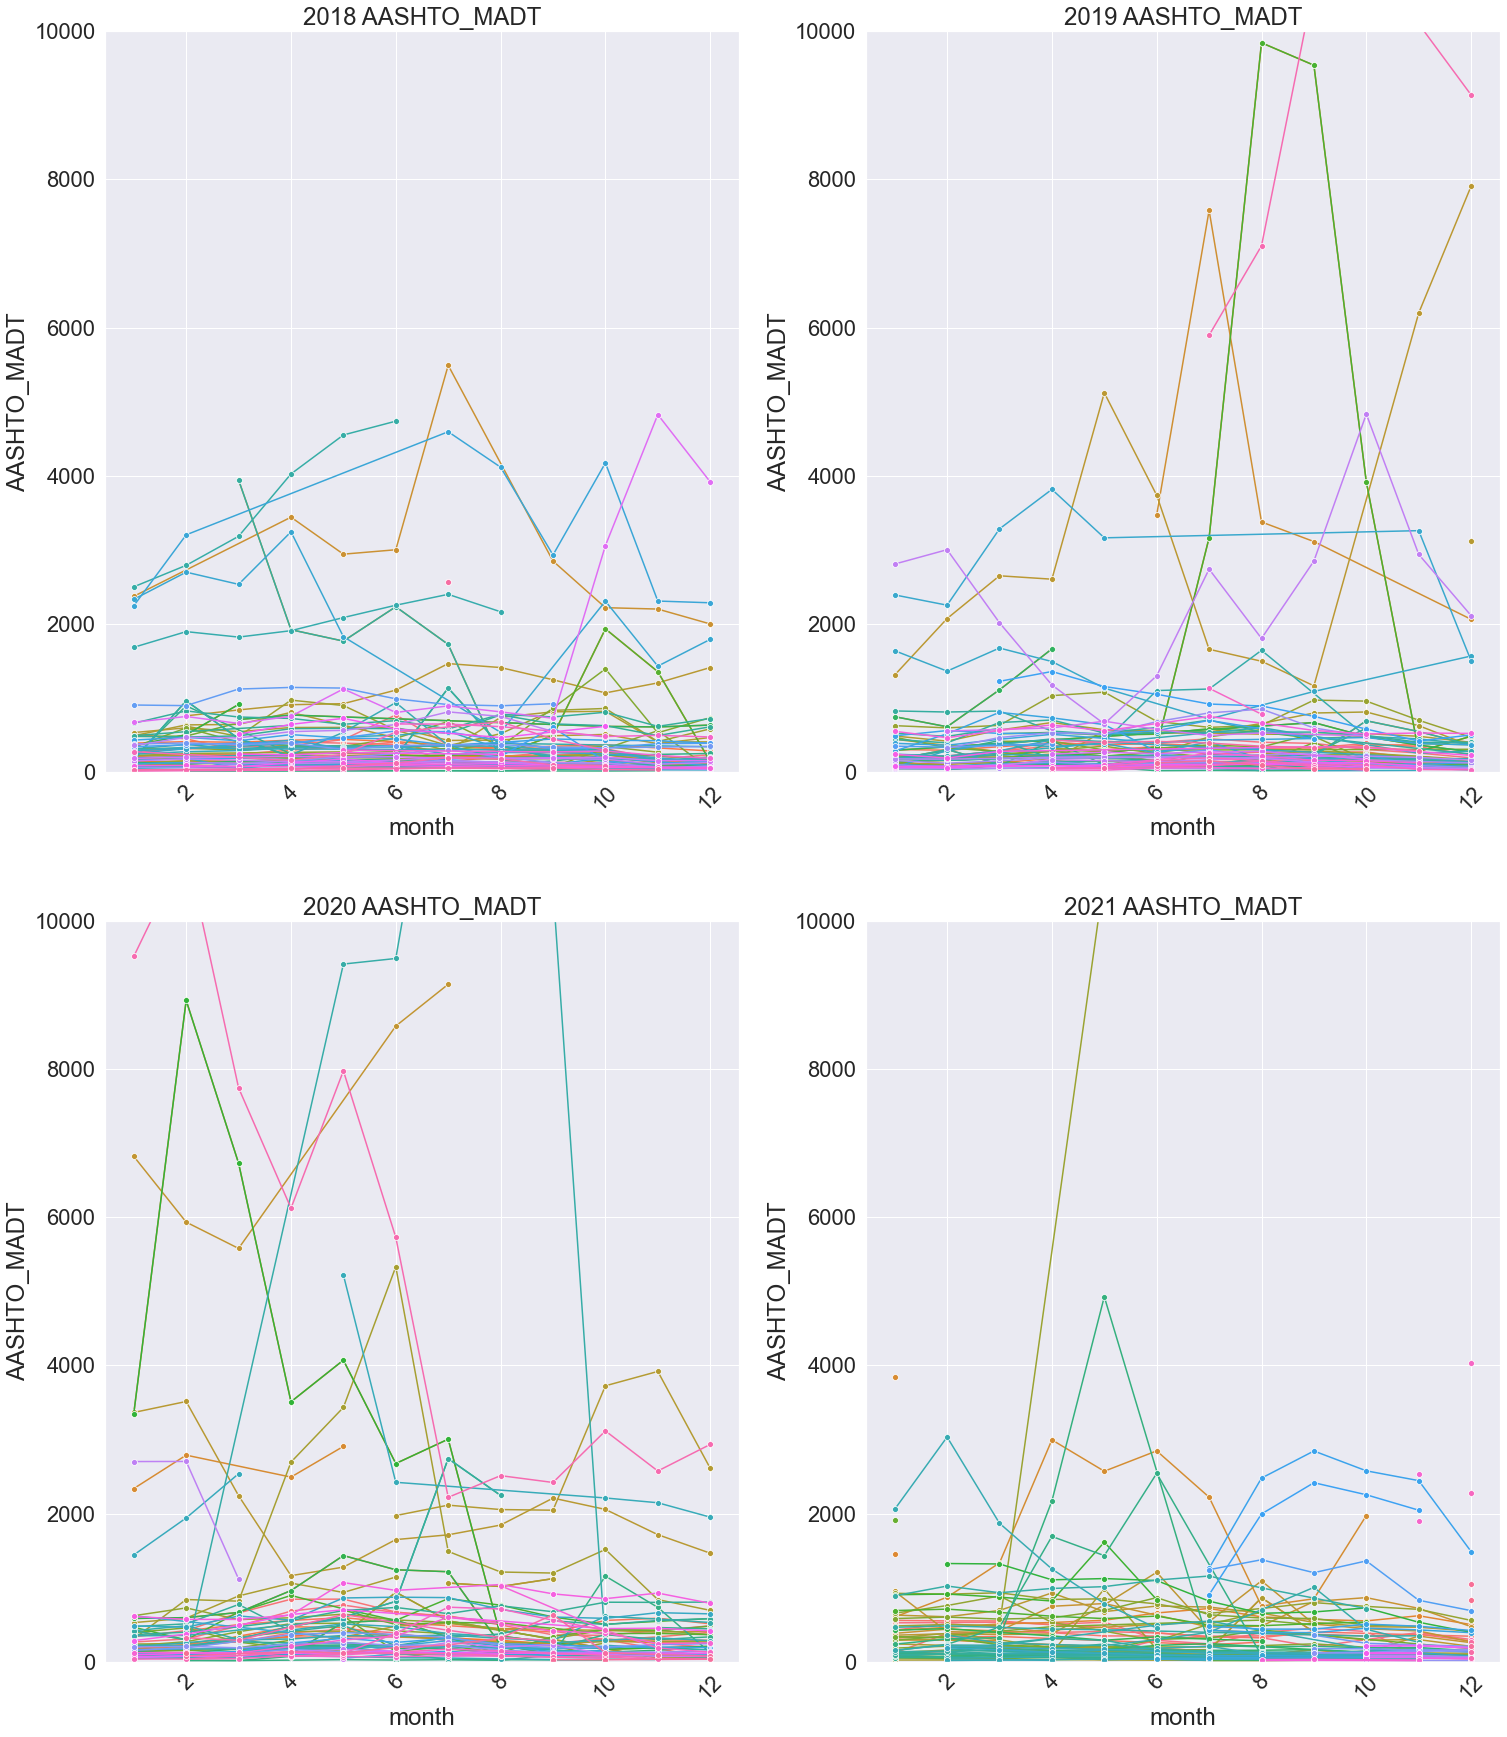

In [126]:
multiplot4_MADT_AASHTO(madt)

In [129]:
madt.to_csv('C:/UC Berkeley Project Backup/AT Census/Pedestrain_Processed Data/permanent_counter_Pedestrain_MADT_data_full_month.csv')

In [133]:
# # Permanent counters
# daily_vol14_per=daily_vol13.loc[daily_vol13['no_of_months_data_collected']>9]
# daily_vol14_short=daily_vol13.loc[daily_vol13['no_of_months_data_collected']<10]

In [130]:
# permanent counters count after QA and QC
madt.groupby(['year'])["ID"].nunique()

year
2018     91
2019     89
2020     92
2021    123
Name: ID, dtype: int64

In [136]:
# permanent counters will be treated as short term sites
# daily_vol14_short.groupby(['year'])["ID"].count()

In [131]:
#Permanent_counter=pd.merge(daily_vol12,daily_vol14_per,left_on=['ID',"year"],right_on=['ID',"year"],how='inner')
# Save the permanent Counter AADBT after bring location and lat and long
madt['type']='eco_permanent'
rur=df21[['ID','location','latitude','longitude']]
p1=pd.merge(rur,madt, left_on=['ID'],right_on=['ID'], how='inner')
p1.head()

,ID,location,latitude,longitude,year,month,MTT,days_in_month,Simple_MADT,AASHTO_MADT,diff,type
0,19211,urban,32.59,-117.11,2018,1,5277.00,31,170.23,171.53,-1.30,eco_permanent
1,19211,urban,32.59,-117.11,2018,2,26993.00,28,964.04,964.04,0.00,eco_permanent
2,19211,urban,32.59,-117.11,2018,3,13817.00,31,445.71,454.36,-8.65,eco_permanent
3,19211,urban,32.59,-117.11,2018,4,6368.00,30,212.27,212.74,-0.48,eco_permanent
4,19211,urban,32.59,-117.11,2018,5,6150.00,31,198.39,198.98,-0.59,eco_permanent


In [132]:
# combine lat and long and make it point geometry
geometry = [Point(xy) for xy in zip(p1.longitude, p1.latitude)]
#df = df.drop(['longitude', 'latitude'], axis=1)
gdfp = gpd.GeoDataFrame(p1, crs="EPSG:4269", geometry=geometry)
gdfp.head()

,ID,location,latitude,longitude,year,month,MTT,days_in_month,Simple_MADT,AASHTO_MADT,diff,type,geometry
0,19211,urban,32.59,-117.11,2018,1,5277.00,31,170.23,171.53,-1.30,eco_permanent,POINT (-117.11242 32.58946)
1,19211,urban,32.59,-117.11,2018,2,26993.00,28,964.04,964.04,0.00,eco_permanent,POINT (-117.11242 32.58946)
2,19211,urban,32.59,-117.11,2018,3,13817.00,31,445.71,454.36,-8.65,eco_permanent,POINT (-117.11242 32.58946)
3,19211,urban,32.59,-117.11,2018,4,6368.00,30,212.27,212.74,-0.48,eco_permanent,POINT (-117.11242 32.58946)
4,19211,urban,32.59,-117.11,2018,5,6150.00,31,198.39,198.98,-0.59,eco_permanent,POINT (-117.11242 32.58946)


<AxesSubplot:>

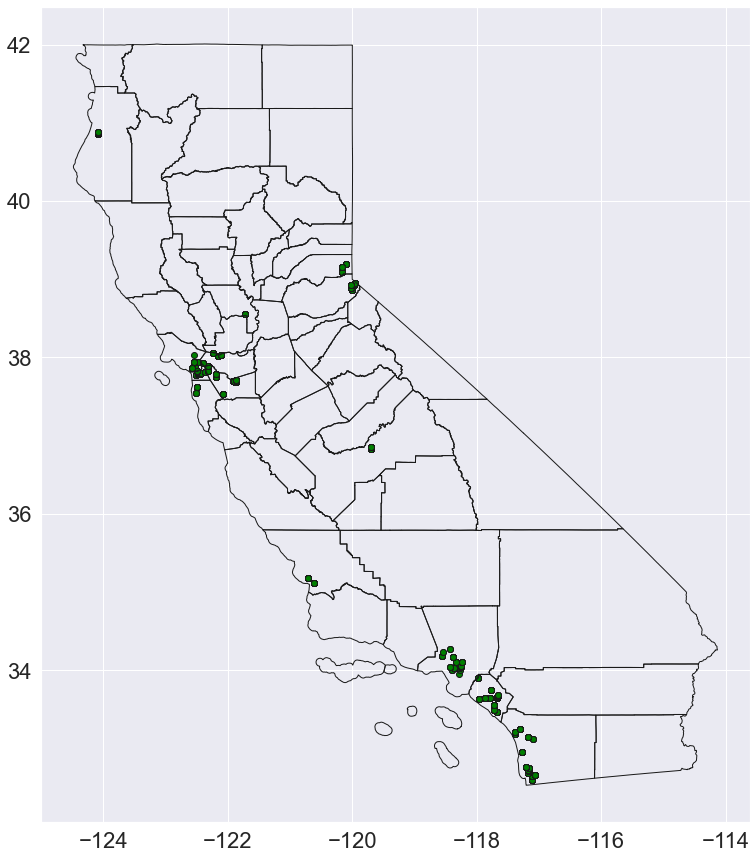

In [133]:
# visualize 
fig, ax = plt.subplots(figsize = (15,15)) 
gdfp.plot(ax=ax,color="green",edgecolor='k',linewidth = 1)
ca_boundary1.plot(color="none",edgecolor='k',linewidth = 1,ax=ax) #Use your second dataframe

In [134]:
# save the permanent counters 
p1.to_csv('C:/UC Berkeley Project Backup/AT Census/Pedestrain_Processed Data/permanent_counter_2018_2021_MADT_Full_month_data.csv')

In [135]:
# data breakdown by rural and urban
p1.groupby(['year','location'])['ID'].nunique()

year  location
2018  rural         9
      urban        82
2019  rural         8
      urban        81
2020  rural         4
      urban        88
2021  rural         4
      urban       119
Name: ID, dtype: int64

In [74]:
# # save the permanent counters that will be considered as short term sites
# Permanent_counter_short=pd.merge(daily_vol12,daily_vol14_short,left_on=['ID',"year"],right_on=['ID',"year"],how='inner')
# # Save the permanent Counter AADBT after bring location and lat and long
# Permanent_counter_short['type']='eco_permanent_short'
# rur1=df21[['ID','location','latitude','longitude']]
# ps1=pd.merge(rur1,Permanent_counter_short, left_on=['ID'],right_on=['ID'], how='inner')
# ps1.head()
# ps1.to_csv('D:/Bike_ped Exposure Model Project/Processed Data/permanent_short_counter_2019_2016_AADBT_data.csv')

# end of the data processing